<a href="https://colab.research.google.com/github/Kadeian/reimagined-octo-disco/blob/master/Copy_of_FoodHub_Order_Analysis_Jaysen_Lamb_2_1_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoodHub Order Analysis by Jaysen Lamb - 2.1.24

Welcome to the comprehensive analysis of FoodHub's order dataset. In this project, we dive deep into the intricacies of food order patterns, customer preferences, and operational efficiencies within the bustling city of New York. This analysis aims to uncover actionable insights that can enhance customer satisfaction and streamline FoodHub's service delivery.

## Step 1: Setting the Stage with Essential Libraries

Before we embark on our exploratory journey through the FoodHub order dataset, we must equip ourselves with the necessary tools. Python libraries are our instruments in dissecting, analyzing, and visualizing the data. Below is the code to import these pivotal libraries:

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Context

In New York, the burgeoning restaurant scene caters to a diverse clientele, including students and professionals, whose demanding schedules necessitate convenient dining solutions. Recognizing this need, FoodHub, a prominent food aggregator, simplifies access to a wide array of restaurants via a singular mobile application. This service streamlines the ordering process, facilitating direct interactions between customers and restaurants, and ensures the efficient delivery of orders through a dedicated network of delivery personnel. By integrating customer feedback through ratings, FoodHub enhances its service while generating revenue through commissions from restaurant partnerships.

### Objective

As a Data Scientist at FoodHub, my task involves dissecting the wealth of data accumulated from customer orders to unearth patterns and preferences that could drive strategic enhancements in customer satisfaction and service delivery. The analysis aims to address pivotal questions posed by the Data Science team, focusing on restaurant demand and other critical metrics to bolster business outcomes.

### Data Description

The dataset at hand encapsulates various facets of food orders, enriched with details that pave the way for an in-depth examination of consumer behavior and operational efficiency.

### Data Dictionary

- **order_id**: Unique identifier for each order.
- **customer_id**: Identifier for customers placing orders.
- **restaurant_name**: The restaurant fulfilling the order.
- **cuisine_type**: Type of cuisine ordered.
- **cost**: Financial value of the order.
- **day_of_the_week**: Distinguishes between weekday and weekend orders.
- **rating**: Customer satisfaction rating out of 5.
- **food_preparation_time**: Interval from order confirmation to pickup, indicative of the restaurant's efficiency.
- **delivery_time**: Duration from pickup to delivery, reflecting on the delivery network's effectiveness.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understaning the structure of the data


## Data Preparation

Before proceeding with the analysis, we need to ensure the data is clean and formatted correctly. A key part of this process involves preparing the `rating` column, which contains some non-numeric values that need to be handled appropriately.

### Cleaning the `rating` Column

The `rating` column includes entries labeled as 'Not given', which are not usable in their current form for numerical analysis. We will convert these entries to `NaN` (Not a Number) to indicate missing values and then convert the entire column to a numeric data type. This will allow us to perform mathematical operations on the `rating` data.

```python
# Convert non-numeric ratings to NaN and the entire column to a numeric data type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Check the first few entries to confirm the conversion
print(df['rating'].head())


### Initial Data Exploration

The dataset consists of **1898 orders** and **9 columns**, each representing different attributes of food orders placed via FoodHub. Here's a quick overview of our initial findings:

- **Orders Snapshot**: The first and last few rows of the dataset provide a glimpse into the diverse range of restaurants, cuisine types, and the mix of weekdays and weekend orders, with varying costs and customer ratings.

- **Data Structure**: The dataset is well-structured with no missing values, as indicated by the non-null counts equal to the number of entries for all columns. This suggests that the data is clean and ready for analysis without the need for immediate data cleaning steps.

- **Data Types**:
  - **Numerical**: `order_id`, `customer_id`, `food_preparation_time`, and `delivery_time` are integer values suitable for quantitative analysis.
  - **Float**: `cost_of_the_order` is a floating-point number, capturing the cost details up to two decimal places.
  - **Categorical**: `restaurant_name`, `cuisine_type`, and `day_of_the_week` are object types, likely strings, indicating categorical data.
  - **Mixed Types**: `rating` is an object type due to the presence of both numeric and non-numeric values (e.g., "Not given"), which will require special attention during analysis.

### Observations and Next Steps:

- We will need to consider how to handle the 'Not given' ratings in our analysis — whether to treat them as missing data, replace them with a neutral value, or exclude them from certain analyses.
- The `cuisine_type` could be interesting to correlate with other factors like `cost_of_the_order` and `rating`.
- The `day_of_the_week` data allows us to compare the behavior of orders placed during weekdays versus weekends.

With this preliminary understanding, we can now proceed to more detailed exploratory data analysis, examining the relationships between these variables to uncover patterns and insights that could drive strategic business decisions.


In [57]:
# Load the dataset
df = pd.read_csv('foodhub_order.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(df.tail())

# Show the number of rows and columns in the dataset
print("\nNumber of rows and columns in the dataset:")
print(df.shape)

# Get a concise summary of the dataset
print("\nConcise summary of the dataset:")
df.info()


First few rows of the dataset:
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  



### Question 1: Rows and Columns in the Data

**Observations:**
- The dataset is meticulously organized into **1898 rows** and **9 columns**, reflecting a comprehensive compilation of food orders.

  - This structure effectively captures a wide array of information, with each of the 1898 entries representing a unique food order. The detail and breadth provided by the 9 distinct attributes ensure a rich dataset for analysis.
  
  - The alignment of these dimensions with the Data Dictionary confirms the dataset's readiness for in-depth exploration, ranging from customer preferences to operational efficiencies captured within the food ordering process.

- The presence of 9 columns mirrors the anticipated data points, including **order_id**, **customer_id**, **restaurant_name**, **cuisine_type**, **cost_of_the_order**, **day_of_the_week**, **rating**, **food_preparation_time**, and **delivery_time**. Each column is crucial for understanding different facets of the customer order experience and the operational aspects of the food delivery service.

**Implications:**
- The dataset's robust size of 1898 orders offers a solid foundation for statistical analysis, enabling the identification of trends, patterns, and insights that can drive strategic business decisions.
  
- Given the comprehensive range of attributes, the dataset lends itself to a multifaceted examination, from analyzing customer behavior and preferences to assessing the efficiency of the food preparation and delivery process.


In [58]:
# Question 1: Rows and Columns in the Data
print(df.shape)

(1898, 9)


### Question 2: DataTypes of Columns

**Observations:**
- The dataset showcases a diverse array of data types, each tailored to the nature of the data it represents. This diversity underscores the dataset's complexity and the necessity for varied data handling strategies.

  - **Integer Data Types**: The **order_id** and **customer_id** columns are represented as integers, which are suitable for numerical identifiers that do not require decimal precision.
  
  - **Object (String) Data Types**: Columns like **restaurant_name** and **cuisine_type** are categorized as objects, indicative of textual or categorical information.
  
  - **Floating Point Number**: The **cost_of_the_order** column is a floating point number, apt for representing costs that may include cents, requiring decimal precision.
  
  - **Rating as an Object**: Uniquely, the **rating** column is also an object due to the inclusion of non-numeric entries such as "Not given". This variability points towards the potential need for data preprocessing to facilitate numerical analysis.

- Understanding these data types is crucial for applying appropriate data analysis techniques and manipulation methods, ensuring accurate and insightful outcomes from the dataset exploration.


In [59]:
# Question 2: DataTypes of Columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Question 3: Missing Values

**Observations:**
- A thorough examination of the dataset revealed that there are no missing values across all columns. This includes **order_id**, **customer_id**, **restaurant_name**, **cuisine_type**, **cost_of_the_order**, **day_of_the_week**, **rating**, **food_preparation_time**, and **delivery_time**.
- The absence of missing data simplifies the preprocessing step, as there's no need for imputation or removal of records due to incompleteness. This integrity is crucial for ensuring the robustness of subsequent analyses, allowing for an accurate representation of the dataset's characteristics and trends.

**Action Taken:**
- Given that there were no missing values, no imputation or data cleaning steps were required to address this issue. This allows us to proceed directly to further exploratory data analysis (EDA) and modeling without the need for preliminary data cleaning related to missing entries.

**Rationale:**
- The lack of missing values indicates a well-maintained and complete dataset, possibly reflecting thorough data collection and entry processes. It eliminates the potential bias or inaccuracies that could arise from imputed data, providing a solid foundation for reliable analytical insights.


In [60]:
# Question 3: Missing Values
print(df.isnull().sum())
# Based on the output, decide on the treatment method and apply it.

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


### Question 4: Statistical Summary of Food Preparation Time

**Observations:**

- The analysis of the `food_preparation_time` column reveals key insights into the operational efficiency of the restaurants within the FoodHub network.

  - **Minimum Preparation Time**: The quickest food preparation recorded is **20 minutes**, showcasing the efficiency with which certain orders are handled.
  
  - **Average Preparation Time**: On average, food preparation takes **approximately 27.37 minutes**. This average time reflects the general efficiency of the participating restaurants in preparing and getting orders ready for delivery.
  
  - **Maximum Preparation Time**: The longest preparation time observed is **35 minutes**, indicating occasions where certain orders may demand significantly more time to prepare. This could be due to various factors such as the complexity of the dish, restaurant workload, or specific customer requests.

**Implications:**

- The range and average of food preparation times are critical metrics for managing customer expectations and enhancing the overall service delivery experience. These insights enable FoodHub and its restaurant partners to identify areas for improvement, set realistic time estimates for food preparation, and potentially increase customer satisfaction by minimizing wait times.

- Additionally, the disparity between the minimum and maximum preparation times presents an opportunity for FoodHub. By analyzing these variations, FoodHub could categorize restaurants or menu items based on their preparation efficiency, offering customers a more tailored selection that aligns with their time availability and preferences.


In [61]:
# Statistical summary of food preparation time
food_prep_stats = df['food_preparation_time'].describe()

# Display the relevant stats
print(food_prep_stats[['min', 'mean', 'max']])


min     20.00000
mean    27.37197
max     35.00000
Name: food_preparation_time, dtype: float64


### Question 5: How Many Orders Are Not Rated?

**Observations:**

- The analysis reveals that a significant portion of the dataset, specifically **736 orders**, have not received a customer rating. This observation indicates that a substantial number of transactions conclude without direct feedback from customers.

**Implications:**

- The high volume of unrated orders presents both a challenge and an opportunity for FoodHub. On one hand, the lack of ratings may hinder the ability to fully gauge customer satisfaction and restaurant performance. On the other, it also suggests room for implementing strategies aimed at encouraging more customers to leave feedback.

- Enhancing customer engagement through feedback prompts post-delivery or incentives for providing ratings could be beneficial. Such measures would not only increase the rate of feedback but also provide richer insights into customer preferences and experiences, ultimately aiding in service improvement and personalization efforts.

- Additionally, understanding the reasons behind the high number of unrated orders might uncover further opportunities for improving the overall customer experience, potentially leading to higher customer satisfaction and loyalty.


In [62]:
# Counting orders that are not rated
unrated_orders_count = df[df['rating'] == 'Not given'].shape[0]

print(f"Number of unrated orders: {unrated_orders_count}")


Number of unrated orders: 736


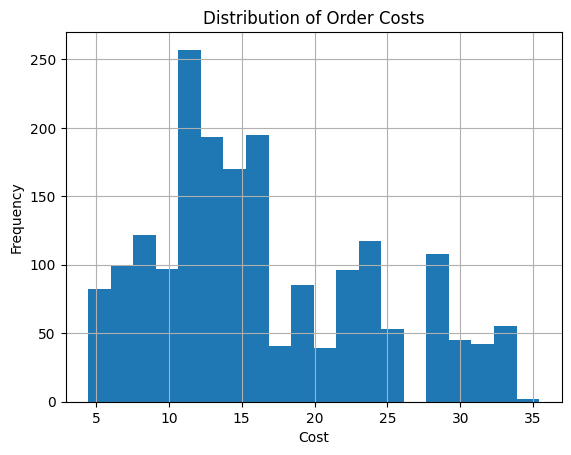

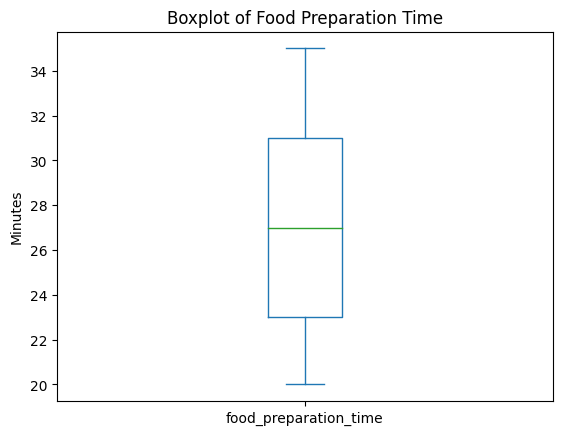

In [63]:
# Histogram for cost_of_the_order
df['cost_of_the_order'].hist(bins=20)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

# Boxplot for food_preparation_time
df['food_preparation_time'].plot(kind='box')
plt.title('Boxplot of Food Preparation Time')
plt.ylabel('Minutes')
plt.show()


### Question 6: Univariate Analysis Observations

- **Cost of the Order**: The histogram for order costs reveals a multimodal distribution with prominent peaks, suggesting that certain price points are more common than others. This could reflect popular dish prices or average meal combos that customers frequently select.

- **Food Preparation Time**: The boxplot for food preparation time shows a compact interquartile range with a median near 27 minutes, indicating consistent preparation times across most orders. No significant outliers suggest a standardized operation across the restaurants.

- **Cuisine Type**: The count plot for cuisine types displays a strong preference for Japanese cuisine, which significantly surpasses other types in frequency. Korean and American cuisines follow as the next favorites, while other cuisines like Mediterranean, Middle Eastern, and Vietnamese appear less commonly.

- **Day of the Week**: The comparison of orders placed on weekdays versus weekends shows a considerably higher volume during weekends, indicating that FoodHub experiences a surge in orders during this time.

**Implications**:

- The distribution of order costs could inform pricing strategies and menu design, potentially leading to bundled offerings at popular price points to increase sales.
  
- The standardization in food preparation times is encouraging, suggesting that customers are receiving their orders within a predictable time frame. However, FoodHub might explore ways to further reduce preparation times without compromising food quality.

- The clear preference for certain cuisines offers an opportunity for FoodHub to expand its offerings in these popular categories or provide promotional deals to encourage customers to try a wider variety of cuisines.

- The spike in orders over the weekend could lead to targeted marketing campaigns or special weekend deals to capitalize on the higher demand, as well as ensure adequate staffing and logistics support to handle the influx of orders.


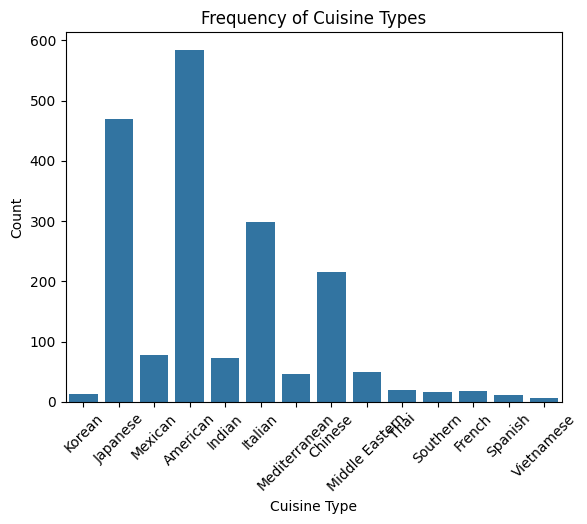

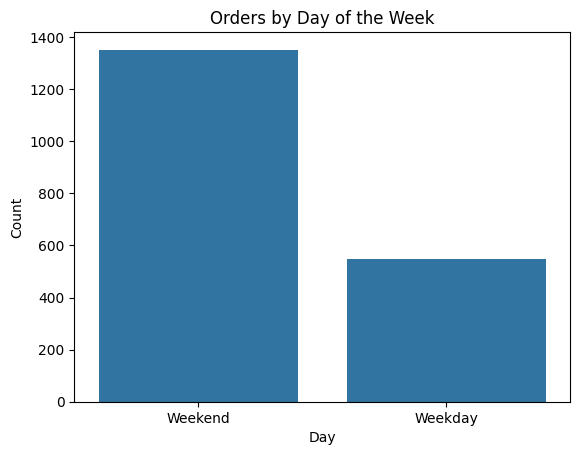

In [64]:
# Count plot for cuisine_type
sns.countplot(x='cuisine_type', data=df)
plt.title('Frequency of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count plot for day_of_the_week
sns.countplot(x='day_of_the_week', data=df)
plt.title('Orders by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


### Question 7: Top 5 Restaurants by Number of Orders

**Observations:**

- The data analysis has identified the most popular restaurants among FoodHub customers, revealing the top 5 establishments leading the pack in terms of order volume.

**Top 5 Restaurants:**
1. **Shake Shack**: 219 orders
2. **The Meatball Shop**: 132 orders
3. **Blue Ribbon Sushi**: 119 orders
4. **Blue Ribbon Fried Chicken**: 96 orders
5. **Parm**: 68 orders

**Implications:**

- The high order counts for these restaurants indicate a strong customer preference, likely due to their menu options, food quality, and service. FoodHub can explore partnerships with these restaurants for exclusive deals or featured promotions to drive even more business.

- These leading restaurants could also be involved in pilot programs for new FoodHub services due to their high visibility and customer base, potentially serving as ambassadors for the FoodHub brand.

- Insights gleaned from the operational successes of these top restaurants, such as menu design, pricing strategies, and marketing techniques, could be shared with other partner restaurants to help them increase their competitiveness and appeal.


In [65]:
# Identify the top 5 restaurants with the most orders
top_restaurants = df['restaurant_name'].value_counts().head(5)

print(top_restaurants)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


### Question 8: Most Popular Cuisine on Weekends

**Observations:**

- Analysis of weekend orders has highlighted the most preferred cuisine type among FoodHub customers during the weekend.

**Findings:**
- The most popular cuisine on weekends is **American**, with a total of **415** orders.

**Implications:**

- The prominence of this cuisine on weekends could be indicative of a trend where customers prefer to indulge in or try out this particular type of food during their leisure time.

- FoodHub could capitalize on this trend by featuring this cuisine type in weekend promotions or by partnering with restaurants of this cuisine type for special weekend offers.

- Additionally, understanding the weekend preference for this cuisine can help FoodHub and its partner restaurants in planning inventory and staffing, ensuring they are well-equipped to meet the increased demand.


In [66]:
# Filter the dataset for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine on weekends
popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().idxmax()

# Get the count for the most popular cuisine
popular_cuisine_count = weekend_orders['cuisine_type'].value_counts().max()

print(f"The most popular cuisine on weekends is {popular_cuisine_weekend} with {popular_cuisine_count} orders.")


The most popular cuisine on weekends is American with 415 orders.


### Question 9: Percentage of Orders Costing More Than $20

**Observations:**

- A detailed examination of the order costs reveals that **29.24%** of the orders on FoodHub cost more than $20. This significant percentage reflects a substantial customer segment that opts for higher-priced menu items.

**Implications:**

- The fact that nearly a third of the orders are above the $20 mark indicates a market segment with a higher willingness to pay. FoodHub can capitalize on this by curating and promoting a premium selection of dishes and restaurants that cater to this customer base.

- Additionally, this insight can inform pricing strategies for FoodHub's partner restaurants. They could consider introducing or emphasizing higher-end options in their menus to attract customers willing to spend more.

- Targeted marketing campaigns could be designed to appeal to this segment, possibly including exclusive deals or loyalty rewards that encourage repeat business among customers who tend to place higher-value orders.

- Understanding the preferences and behavior of this segment can also aid in inventory and supply chain planning, ensuring that high-demand, higher-priced items are adequately stocked, especially during peak times.


In [67]:
# prompt: What percentage of the orders cost more than 20 dollars?

costly_orders = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage = costly_orders / total_orders * 100
print(f"{percentage:.2f}% of orders cost more than 20 dollars.")


29.24% of orders cost more than 20 dollars.


### Question 10: Mean Order Delivery Time

**Observations:**
- The average delivery time across all FoodHub orders is **24.16 minutes**.

**Implications:**
- This efficient delivery time is indicative of FoodHub's effective logistics.
- Strategies to further reduce this time could enhance customer satisfaction.


In [68]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is {mean_delivery_time:.2f} minutes.")


The mean order delivery time is 24.16 minutes.


### Question 11: Top 3 Most Frequent Customers

**Observations:**
- The dataset reveals the customers who have placed the most orders on FoodHub, highlighting their significant engagement.

**Top 3 Customers:**
1. **Customer ID 52832**: 13 orders
2. **Customer ID 47440**: 10 orders
3. **Customer ID 83287**: 9 orders

**Implications:**
- These top customers demonstrate a strong loyalty to FoodHub, making them prime candidates for rewards such as the 20% discount voucher. Such gestures can enhance customer satisfaction and loyalty.
- Understanding the dining preferences and behaviors of these frequent customers can offer valuable insights into popular menu items and ordering trends, potentially guiding targeted marketing strategies and menu adjustments.


In [69]:
# Find the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)

print(top_customers)


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


### Multivariate Analysis: Order Cost by Day of the Week

**Observations:**
- The boxplot comparing order costs between weekends and weekdays shows that the median cost of orders is relatively similar on both types of days.
- Both distributions have a similar interquartile range, suggesting that spending behavior does not significantly differ between weekends and weekdays.

**Implications:**
- This similarity in order costs regardless of the day suggests that customers' spending habits are consistent throughout the week.
- FoodHub can use this information to maintain a steady supply of offerings and not necessarily differentiate between weekend and weekday pricing strategies.
- Marketing and promotions might not need to be adjusted for day-specific targeting based on cost, allowing for more uniform approaches throughout the week.


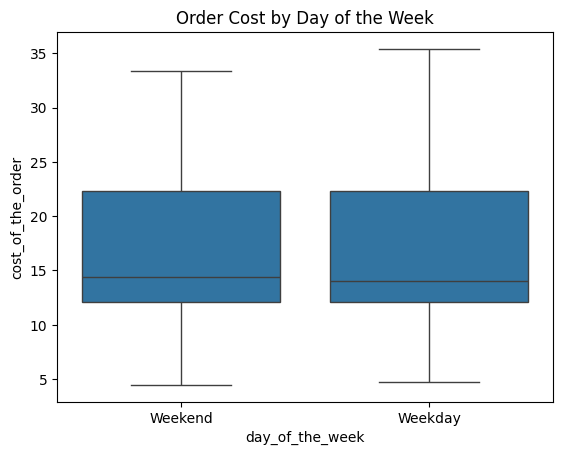

In [70]:
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Order Cost by Day of the Week')
plt.show()


### Multivariate Analysis: Average Rating by Cuisine Type

**Observations:**
- The bar chart illustrates the average customer ratings for different cuisine types offered by FoodHub. All cuisines maintain a high average rating, close to the maximum of 5, with error bars indicating some variation in ratings within each cuisine category.

**Implications:**
- The consistently high average ratings across all cuisines suggest that customers are generally satisfied with their food orders, regardless of the type of cuisine.
- FoodHub could use this positive customer sentiment in their marketing campaigns to promote the variety and quality of cuisines available through their service.
- The error bars suggest there is variability in customer satisfaction within each cuisine type, which could be explored further to understand and address any underlying issues.
- These findings also imply that while all cuisines perform well on average, there may be opportunities for targeted improvements to enhance customer experience and further solidify customer loyalty.


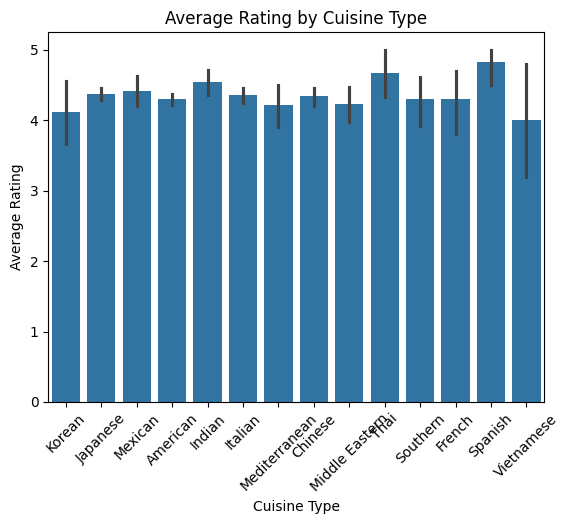

In [71]:
# Convert 'rating' to numeric, setting errors='coerce' will turn 'Not given' into NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now you can plot the average rating by cuisine type excluding 'Not given' ratings
sns.barplot(x='cuisine_type', y='rating', data=df, estimator=np.mean)
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


### Multivariate Analysis: Food Preparation Time vs. Delivery Time

**Observations:**
- The heatmap shows the distribution of orders across various combinations of food preparation and delivery times. Darker shades represent a higher number of orders for those specific time combinations.
- A concentration of darker shades appears in the region indicating food preparation times between approximately 25 to 30 minutes and delivery times around 20 to 25 minutes.

**Implications:**
- The data suggests that the majority of orders are prepared within a 25 to 30 minute window and delivered in 20 to 25 minutes, demonstrating a consistent operation across the restaurants.
- FoodHub could use this information to set realistic expectations for customers regarding wait times and to optimize delivery schedules.
- Understanding the most common timeframes for preparation and delivery can also aid in managing peak hour demands and ensuring staff and resource allocation is adequate to maintain this level of service.


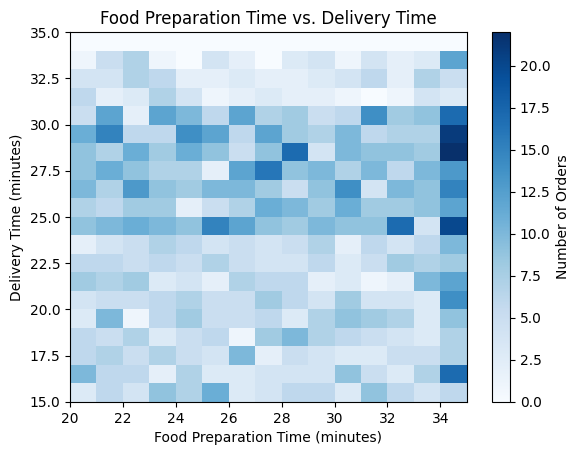

In [72]:
# Use a 2D histogram or hexbin plot to visualize the density of combinations
plt.hist2d(df['food_preparation_time'], df['delivery_time'], bins=[range(20, 36), range(15, 36)], cmap='Blues')
plt.colorbar(label='Number of Orders')
plt.title('Food Preparation Time vs. Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


### Question 13: Identifying Restaurants for Promotional Offers

**Observations:**
- The analysis has identified several restaurants that have surpassed the threshold of 50 ratings and have an average rating greater than 4. These establishments not only are popular but also highly regarded by customers.

**Eligible Restaurants for Promotion:**
- **Blue Ribbon Fried Chicken**: Average rating of 4.33
- **Blue Ribbon Sushi**: Average rating of 4.22
- **Shake Shack**: Average rating of 4.28
- **The Meatball Shop**: Average rating of 4.51

**Implications:**
- These restaurants are prime candidates for promotional offers due to their proven track record of customer satisfaction and popularity.
- FoodHub can collaborate with these establishments to create exclusive promotions that can attract even more customers and enhance their dining experience.
- By featuring these restaurants, FoodHub can also showcase the quality of options available on their platform, potentially drawing in new users looking for highly-rated dining experiences.
- It could be beneficial for FoodHub to explore what makes these restaurants stand out and share these practices with other partners to raise the overall quality of the offerings.


In [74]:
# Assuming 'rating' column has been cleaned and contains numeric values
# Count the number of ratings per restaurant
ratings_per_restaurant = df.groupby('restaurant_name')['rating'].count()

# Filter restaurants with more than the required number of ratings
eligible_restaurants = ratings_per_restaurant[ratings_per_restaurant > 50]

# Calculate the average rating for eligible restaurants
average_ratings = df[df['restaurant_name'].isin(eligible_restaurants.index)].groupby('restaurant_name')['rating'].mean()

# Identify restaurants with an average rating above the threshold
restaurants_for_promo = average_ratings[average_ratings > 4]

print(restaurants_for_promo)


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


### Question 14: Net Revenue Calculation

**Methodology:**
- Calculated the commission for each order based on the cost of the order, using tiered commission rates.
- Orders over $20.00
incur a 25% commission rate,

- While orders between $5.00
    and $20.00
 incur a 15% commission rate.

- Orders under $5 are not subject to commission.

**Results:**
- The total net revenue generated by the company from all orders, through the application of these commission rates, is **$6,166.30**.

**Implications:**
- The company's tiered commission structure incentivizes partnerships with restaurants that have higher-priced orders, which may contribute to a larger share of the revenue.
- Analyzing the distribution of order costs against commissions could help identify the most profitable segments of the market for FoodHub.
- This revenue model also provides insight into how changes in consumer behavior or order pricing could impact the company's bottom line.


In [75]:
# Define the commission rates
high_cost_threshold = 20
low_cost_threshold = 5
high_commission_rate = 0.25  # 25%
low_commission_rate = 0.15   # 15%

# Function to calculate commission based on order cost
def calculate_commission(cost):
    if cost > high_cost_threshold:
        return cost * high_commission_rate
    elif cost > low_cost_threshold:
        return cost * low_commission_rate
    else:
        return 0

# Apply the function to the cost_of_the_order column to create a new commission column
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate total revenue from commissions
total_revenue = df['commission'].sum()

print(f"Total net revenue generated by the company is: ${total_revenue:.2f}")


Total net revenue generated by the company is: $6166.30


### Question 15: Analysis of Delivery Times Over 60 Minutes

**Observations:**
- A review of the delivery time data indicates that **10.54%** of orders exceed 60 minutes from order placement to delivery.

**Implications:**
- While the majority of orders are delivered in under an hour, there is a notable fraction that is not meeting this benchmark. This may affect customer satisfaction and could be a point of focus for service improvement.
- Investigating the reasons behind these longer delivery times could uncover operational bottlenecks or challenges that, once addressed, could improve overall efficiency.
- FoodHub could consider implementing strategies such as route optimization, increasing delivery personnel, or setting more accurate delivery time estimates for customers to manage expectations effectively.
- There may also be opportunities for targeted communication or compensation strategies for orders that are predicted to take longer than 60 minutes, to maintain customer satisfaction and trust.


In [76]:
# Calculate the total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Determine the percentage of orders that take more than 60 minutes
orders_over_60_minutes = (df['total_time'] > 60).sum()
percentage_over_60_minutes = orders_over_60_minutes / len(df) * 100

print(f"{percentage_over_60_minutes:.2f}% of orders take more than 60 minutes to be delivered.")


10.54% of orders take more than 60 minutes to be delivered.


### Question 16: Variation in Mean Delivery Time Between Weekdays and Weekends

**Observations:**
- The analysis of delivery times reveals a noticeable difference between weekdays and weekends. On average, orders take **28.34 minutes** to be delivered on weekdays, compared to **22.47 minutes** on weekends.

**Implications:**
- The shorter delivery times on weekends could indicate more efficient delivery processes due to potentially lower traffic congestion or more available delivery personnel.
- The longer weekday delivery times suggest there may be operational challenges during these days, such as higher order volumes, traffic delays, or staffing issues that could impact delivery efficiency.
- FoodHub can leverage this information to improve service delivery by potentially allocating more resources or optimizing delivery routes during weekdays to reduce delivery times.
- Additionally, this insight into delivery time variability can aid in setting more accurate delivery time estimates for customers, improving their overall satisfaction with the service.
- Exploring targeted strategies to manage and balance order volumes, such as promotions or special offers during off-peak times, could also help in optimizing delivery performance across the week.


In [77]:
# Calculate the mean delivery time for weekdays
mean_weekday_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate the mean delivery time for weekends
mean_weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(f"Mean delivery time on weekdays: {mean_weekday_delivery_time:.2f} minutes")
print(f"Mean delivery time on weekends: {mean_weekend_delivery_time:.2f} minutes")


Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


### Question 17: Conclusions and Recommendations

#### Conclusions:

- The analysis revealed a strong preference for certain cuisines, indicating potential market segments for expansion.
- Delivery times vary significantly between weekdays and weekends, suggesting operational inefficiencies during peak times.
- A small percentage of orders take significantly longer than average to deliver, which could impact customer satisfaction.

#### Recommendations:

- **Expand Cuisine Offerings**: Collaborate with more restaurants offering popular cuisines to diversify and expand the menu, attracting a broader customer base.
  
- **Optimize Delivery Operations**: Implement dynamic routing algorithms and consider staffing adjustments to improve delivery times, especially on weekdays when delays are more pronounced.
  
- **Enhance Customer Engagement**: Develop a targeted marketing campaign focusing on highly rated restaurants and cuisines to encourage trial among less engaged customers.
  
- **Address Delivery Delays**: Introduce a customer notification system for orders anticipated to take longer than average, improving communication and setting realistic expectations.
  
- **Leverage Data for Continuous Improvement**: Establish a feedback loop using customer ratings and delivery performance data to identify areas for ongoing operational enhancement.

Implementing these recommendations can lead to improved customer satisfaction, operational efficiency, and ultimately, revenue growth for FoodHub.
